In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
#haha

oxford = rasterio.open("data/Oxford.tif")
central_park = rasterio.open("data/CentralPark.tif")

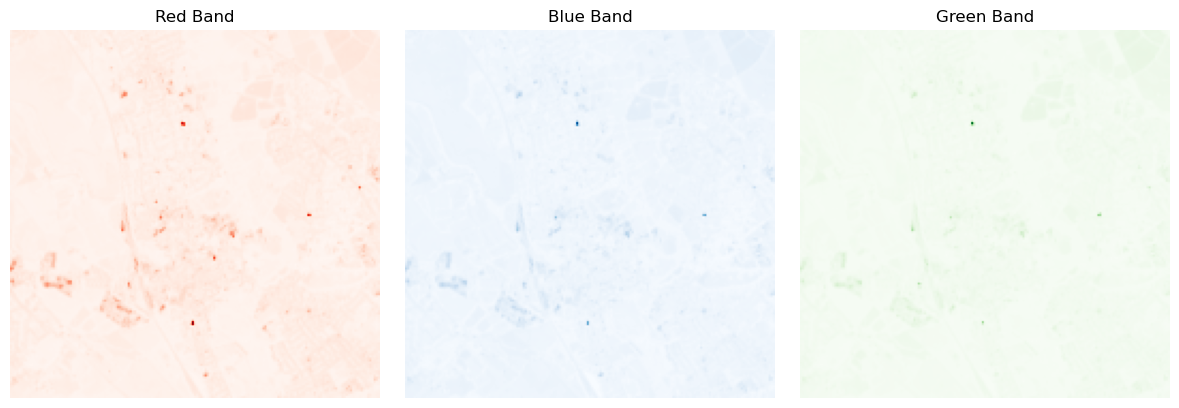

In [2]:
oxford_np = oxford.read()
data_min = oxford_np.min()
data_max = oxford_np.max()

# Normalize to [0, 1] 
normalized_data = ((oxford_np - data_min) / (data_max - data_min)) 

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
cmaps = ["Reds", "Blues", "Greens"]
bands = ["Red Band", "Blue Band", "Green Band"]
for band in [3, 2, 1]:
    ax[band-1].imshow(normalized_data[band, :, :], cmap=cmaps[band-1])
    ax[band-1].set_title(bands[band-1])
    ax[band-1].axis("off")
plt.tight_layout();

In [31]:
def scale_to_8bit(image, lower_percent=1, upper_percent=99):
    # Calculate the percentiles to stretch
    min_val = np.percentile(image, lower_percent)
    max_val = np.percentile(image, upper_percent)

    # Apply the linear stretch
    stretched_img = np.clip(image, min_val, max_val)

    # Scale values to 0-255
    scaled_img = ((stretched_img - min_val) / (max_val - min_val)) * 255.0
    scaled_img = scaled_img.astype(np.uint8)  # Convert to 8-bit values

    return scaled_img

def visualize(imagery):
    red_band = imagery.read(4)
    green_band = imagery.read(3)
    blue_band = imagery.read(2)

    scaled_red = scale_to_8bit(red_band)
    scaled_green = scale_to_8bit(green_band)
    scaled_blue = scale_to_8bit(blue_band)

    # Combine the scaled bands into a single RGB image
    rgb_image = np.stack((scaled_red, scaled_green, scaled_blue), axis=-1)

    plt.figure(figsize=(5, 5))
    plt.imshow(rgb_image)
    plt.axis("off")
    plt.title("All bands")

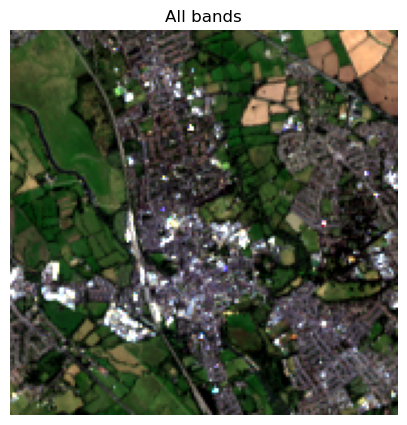

In [32]:
visualize(oxford)

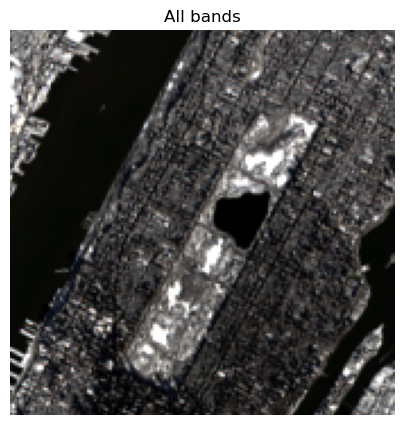

In [55]:
visualize(central_park)

In [7]:
../imagery/ET2000L7/ET200000000001-953105852336.tif

SyntaxError: invalid syntax (991400135.py, line 1)

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def scale_to_8bit(image, lower_percent=1, upper_percent=99):
    min_val = np.percentile(image, lower_percent)
    max_val = np.percentile(image, upper_percent)
    stretched_img = np.clip(image, min_val, max_val)
    scaled_img = ((stretched_img - min_val) / (max_val - min_val)) * 255.0
    return scaled_img.astype(np.uint8)


# Function to normalize the pixel values to the range 0-255
def normalize(array):
    array_min, array_max = 0, 3000
    normalized = ((array - array_min) / (array_max - array_min) * 255).astype(np.float32)
    # return (array/1000).astype(np.uint8)
    # Clip values to the specified range (0-255 by default)
    return np.clip(normalized, 0, 255).astype(np.uint8)

# Load .tif image
with rasterio.open("../imagery/ET2000L7/ET200000000001-953105852336.tif") as src:
    band_count = src.count
    print(f"Total bands: {band_count}")
    
    fig, axes = plt.subplots(1, band_count, figsize=(5 * band_count, 5))
    if band_count == 1:
        axes = [axes]

    for i in range(1, band_count + 1):
        band = src.read(i)
        band_8bit = scale_to_8bit(band)
        axes[i-1].imshow(band_8bit)
        axes[i-1].set_title(f'Band {i}')
        axes[i-1].axis('off')

    plt.tight_layout()
    plt.show()


Total bands: 17


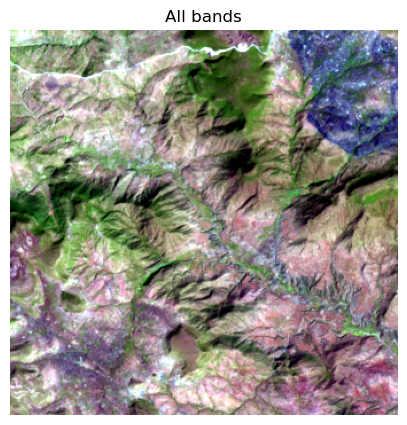

In [6]:
# data/CentralPark.tif
# data/Oxford.tif
# ../imagery/ET2000L7/ET200000000001-953105852336.tif
# ../imagery/ET2016L8/ET201600000001-1453793262739.tif
with rasterio.open("../data/imagery/ET2016L8/ET201600000001-1453793262739.tif") as src:

    band_count = src.count
    print(f"Total bands: {band_count}")
    
    image_list = []
    include = [4,3,2]
    land_mois = [7,4,2]
    agri = [6,5,4]

    for i in agri:
        image_list.append(scale_to_8bit(src.read(i)))
    image = np.stack(image_list, axis=-1)
    
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis("off")
    plt.title("All bands")


Processing data/Oxford.tif...
  Total bands: 12


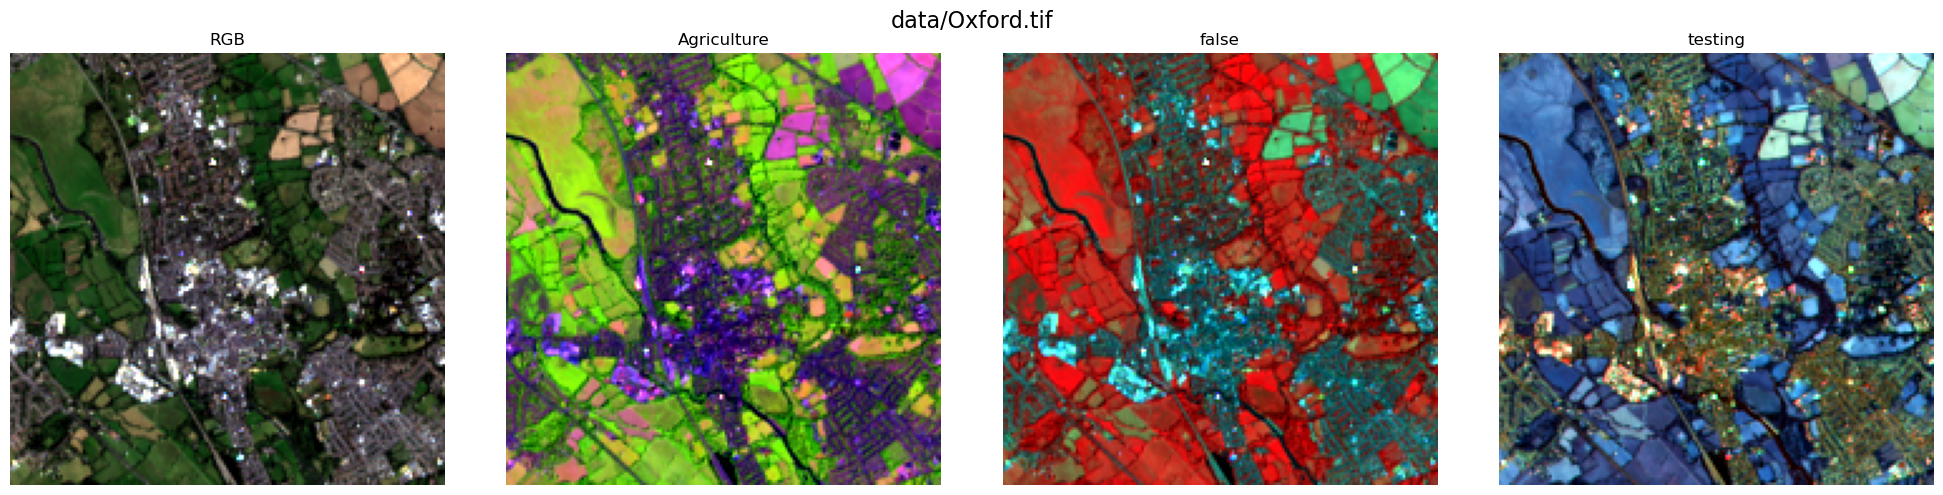


Processing ../data/imagery/ET2000L7/ET200000000001-953105852336.tif...
  Total bands: 15


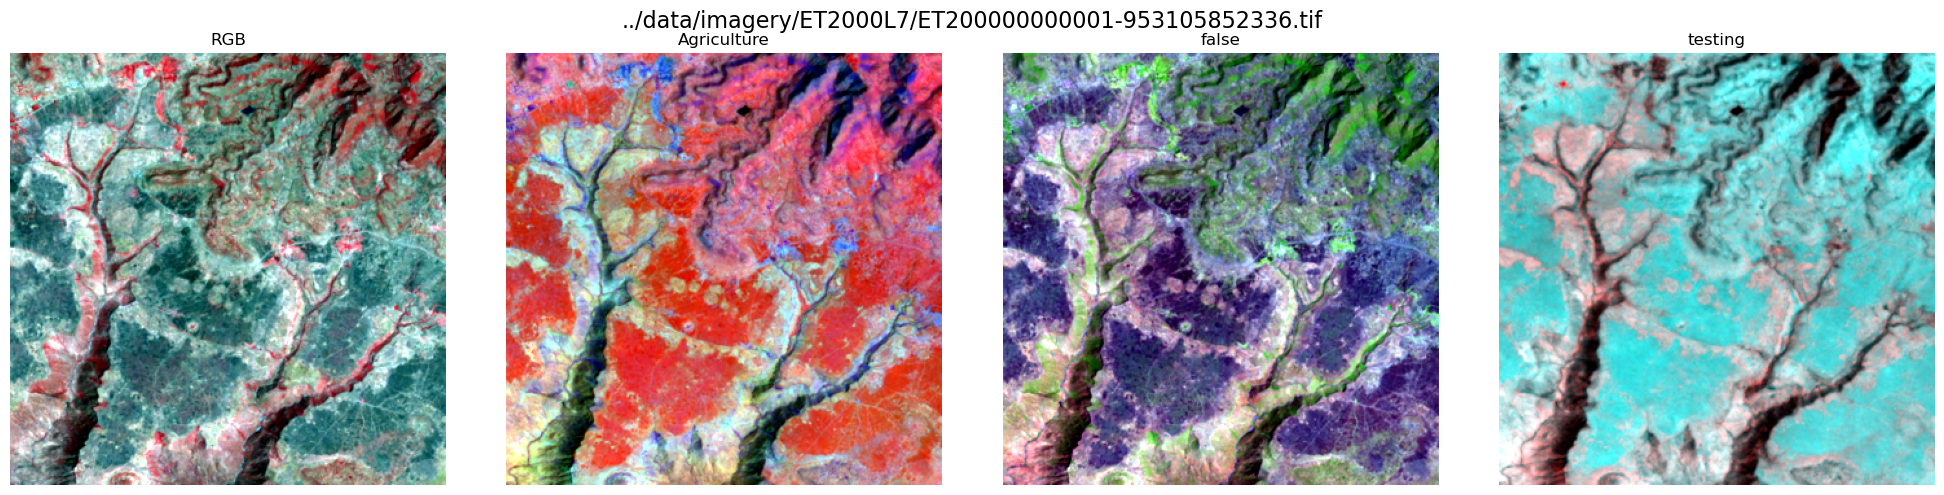


Processing ../data/imagery/ET2011L7/ET201000000001-1300865613158.tif...
  Total bands: 15


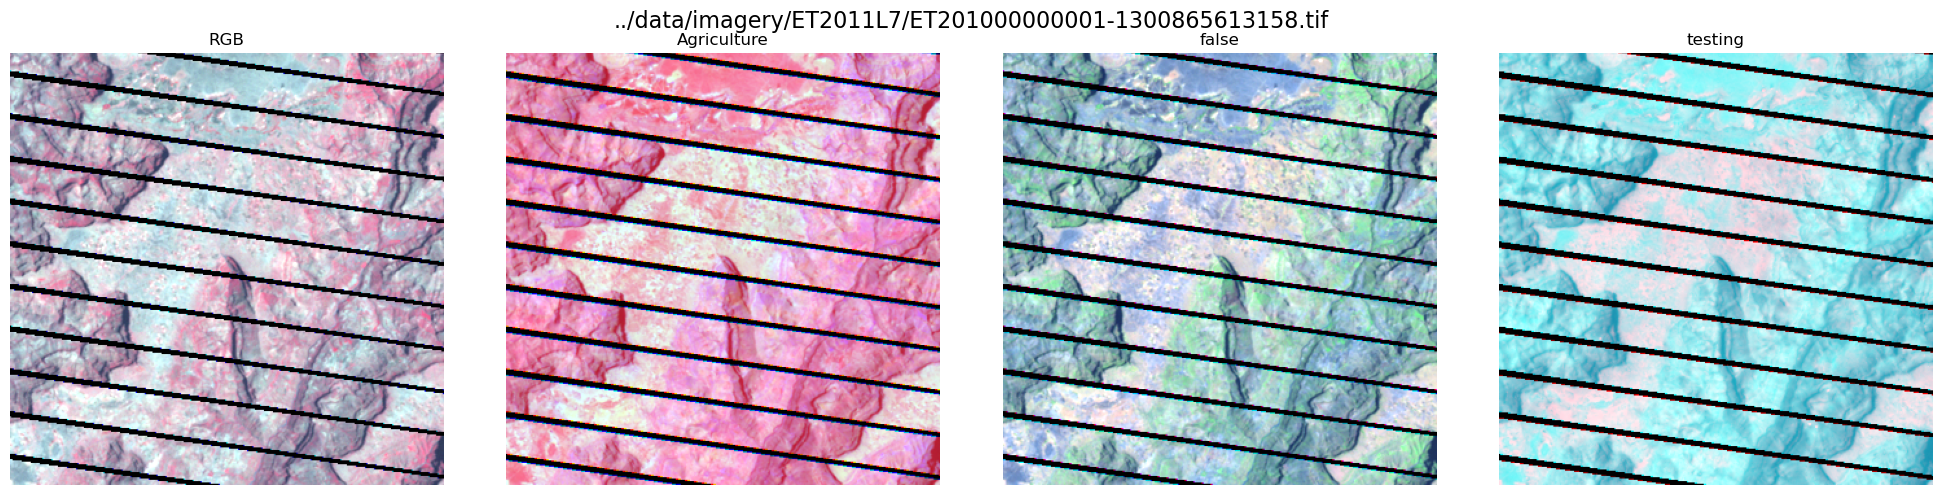

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio

def scale_to_8bit(image, lower_percent=1, upper_percent=99):
    min_val = np.percentile(image, lower_percent)
    max_val = np.percentile(image, upper_percent)
    stretched_img = np.clip(image, min_val, max_val)
    scaled_img = ((stretched_img - min_val) / (max_val - min_val)) * 255.0
    return scaled_img.astype(np.uint8)

# List of TIF files to process
file_list = [
    "data/Oxford.tif",
    "../data/imagery/ET2000L7/ET200000000001-953105852336.tif",
    "../data/imagery/ET2011L7/ET201000000001-1300865613158.tif"
]

# Define band combinations and names
bands = [[3,2,1], [6,5,4],[5,4,2],[8,7,6]]
bands_name = ["RGB", "Agriculture", "false","testing"]

# Loop over each file
for file_path in file_list:
    print(f"\nProcessing {file_path}...")
    
    with rasterio.open(file_path) as src:
        band_count = src.count
        print(f"  Total bands: {band_count}")

        # Create a figure for this image
        fig, axes = plt.subplots(1, len(bands), figsize=(5*len(bands), 5))
        fig.suptitle(f"{file_path}", fontsize=16)

        for i in range(len(bands)):
            band = bands[i]
            image_list = []
            for k in band:
                # Check if the band index is valid for this image
                if k <= band_count:
                    image_list.append(scale_to_8bit(src.read(k+(i==0))))
                else:
                    print(f"    Warning: band {k} not available in {file_path} (max {band_count}), filling with zeros")
                    image_list.append(np.zeros((src.height, src.width), dtype=np.uint8))

            image = np.stack(image_list, axis=-1)

            ax = axes[i]
            ax.imshow(image)
            ax.axis("off")
            ax.set_title(bands_name[i])

        plt.tight_layout()
        plt.show()  # You can also plt.savefig(f"{output_name}.png") if you want to save them


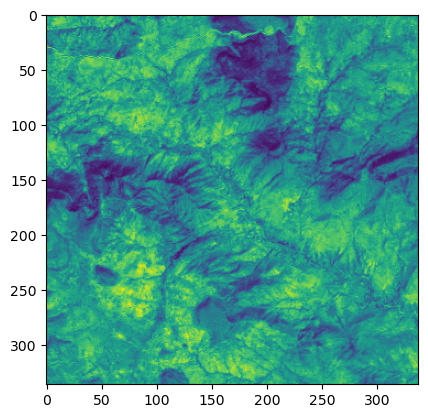

In [37]:
import rasterio
import numpy as np

# Open NIR and RED bands (assuming you have the TIFF files)
with rasterio.open("../data/imagery/ET2016L8/ET201600000001-1453793262739.tif") as src:
    nir = src.read(4).astype(float)
    red = src.read(3).astype(float)


# Avoid division by zero
np.seterr(divide='ignore', invalid='ignore')

# NDVI formula
ndvi = (nir - red) / (nir + red)
fig, ax = plt.subplots()
ax.imshow(ndvi)
